In [1]:
pip install pandas numpy matplotlib scikit-learn


Mean Squared Error: 23.38978494209427
R^2 Score: 0.011466894455815835


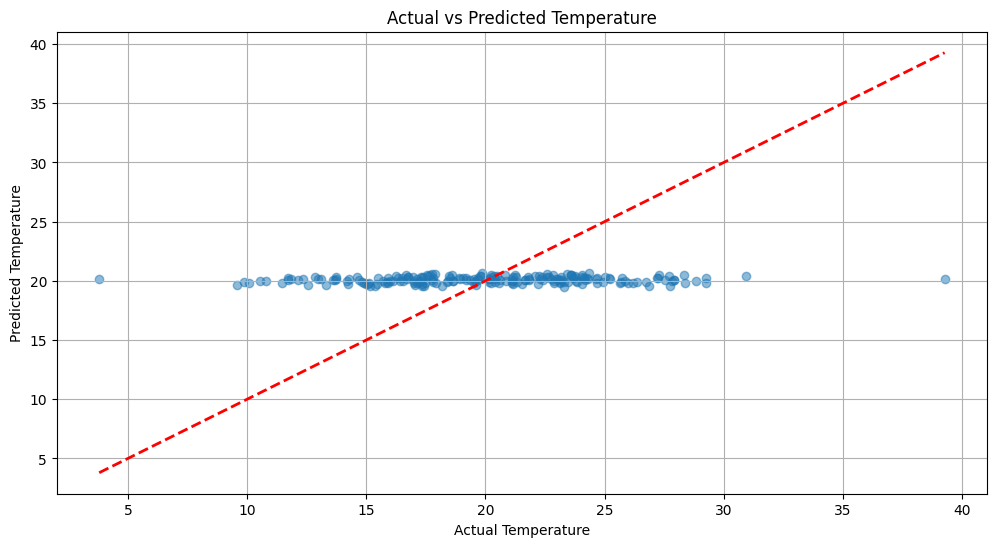

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic weather data
np.random.seed(42)  # For reproducibility
data_size = 1000
dates = pd.date_range(start='2020-01-01', periods=data_size, freq='H')
temperature = np.random.normal(loc=20, scale=5, size=data_size)  # Average temperature of 20 with some noise
humidity = np.random.uniform(low=30, high=90, size=data_size)  # Humidity between 30% and 90%
pressure = np.random.uniform(low=980, high=1020, size=data_size)  # Pressure in hPa

# Create a DataFrame
weather_data = pd.DataFrame({
    'Date': dates,
    'Temperature': temperature,
    'Humidity': humidity,
    'Pressure': pressure
})

# Feature engineering: Use previous hours' data as features
weather_data['Temperature_Lag1'] = weather_data['Temperature'].shift(1)
weather_data['Humidity_Lag1'] = weather_data['Humidity'].shift(1)
weather_data['Pressure_Lag1'] = weather_data['Pressure'].shift(1)

# Drop NaN values generated by lagging
weather_data = weather_data.dropna()

# Define features and target
X = weather_data[['Temperature_Lag1', 'Humidity_Lag1', 'Pressure_Lag1']]
y = weather_data['Temperature']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Visualize the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.grid()
plt.show()
